# Unsupervised Learning: Wastewater Treatment Data 

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("water_treatment.csv")
display(df)
print(df.shape)

,Date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,01/03/1990,44101,1.5,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70,?,79.4,87.3,99.6
1,02/03/1990,39024,3,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,04/03/1990,32229,5,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,05/03/1990,35023,3.5,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,06/03/1990,36924,1.5,8.0,242,496,176,64.8,4,2110,...,2120,?,62.7,95.6,?,71,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,26/08/1991,32723,0.16,7.7,93,252,176,56.8,2.3,894,...,942,?,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,27/08/1991,33535,0.32,7.8,192,346,172,68.6,4,988,...,950,?,58.3,97.8,83,59.1,91.1,74.6,90.7,100
524,28/08/1991,32922,0.3,7.4,139,367,180,64.4,3,1060,...,1136,?,65,97.1,76.2,66.4,82,77.1,88.9,99
525,29/08/1991,32190,0.3,7.3,200,545,258,65.1,4,1260,...,1326,39.8,65.9,97.1,81.7,70.9,89.5,87,89.5,99.8


(527, 39)


## Split the data into 1990 (training) and 1991 (testing)

In [2]:
# Remove missing rows
df = df.replace('?', np.nan)
df.dropna(inplace=True)
print(df.shape)

# Get the dates
date = pd.to_datetime(df['Date'], format='mixed')
print(date.dt.year)

(380, 39)
3      1990
8      1990
9      1990
10     1990
14     1990
       ... 
516    1991
517    1991
519    1991
520    1991
525    1991
Name: Date, Length: 380, dtype: int32


In [3]:
df['Year'] = date.dt.year
display(df)
print(df.shape)

,Date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G,Year
3,05/03/1990,35023,3.5,7.9,205,588,192,65.6,4.5,2430,...,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100,1990
8,11/03/1990,29156,2.5,7.7,206,451,194,69.1,4.5,1249,...,46.1,43.6,92.5,85.6,58.2,92.2,73.8,90.2,99.4,1990
9,12/03/1990,39246,2,7.8,172,506,200,69,5,1865,...,21.2,59.7,90.8,88.4,66.1,89,69,86.5,99.6,1990
10,13/03/1990,42393,0.7,7.9,189,478,230,67,5.5,1410,...,0.6,45.8,92,11.6,25.7,19.6,36,43,36.4,1990
14,18/03/1990,40923,3.5,7.6,146,329,188,57.4,2.5,1300,...,32.7,33.3,90,82.6,61.3,87,71.4,78.2,99.2,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,19/08/1991,32363,0.1,7.6,159,310,146,68.5,1.6,1096,...,25.2,61.4,91.2,78.6,65.1,86.8,81,89,99.4,1991
517,20/08/1991,31437,0.47,7.6,132,304,148,64.9,2,939,...,45.6,60.3,94.4,82.5,72.9,89.4,86.2,91.2,99.5,1991
519,22/08/1991,28088,0.2,7.5,153,307,124,82.3,2.5,1044,...,40.5,54.4,94,89.7,75.5,93.5,85,90.3,100,1991
520,23/08/1991,27838,0.13,7.6,179,265,128,71.9,1.8,992,...,13.7,45,95,87.5,71.3,93.9,79.6,89.1,100,1991


(380, 40)


In [4]:
X_train = df.iloc[(df['Year'] == 1990).to_numpy().astype(bool), 1:-1].to_numpy()
X_test = df.iloc[(df['Year'] == 1991).to_numpy().astype(bool), 1:-1].to_numpy()
X_train = np.array(X_train, dtype=float)
X_test = np.array(X_test, dtype=float)
print(X_train.shape)
print(X_test.shape)

(220, 38)
(160, 38)


## View the time series

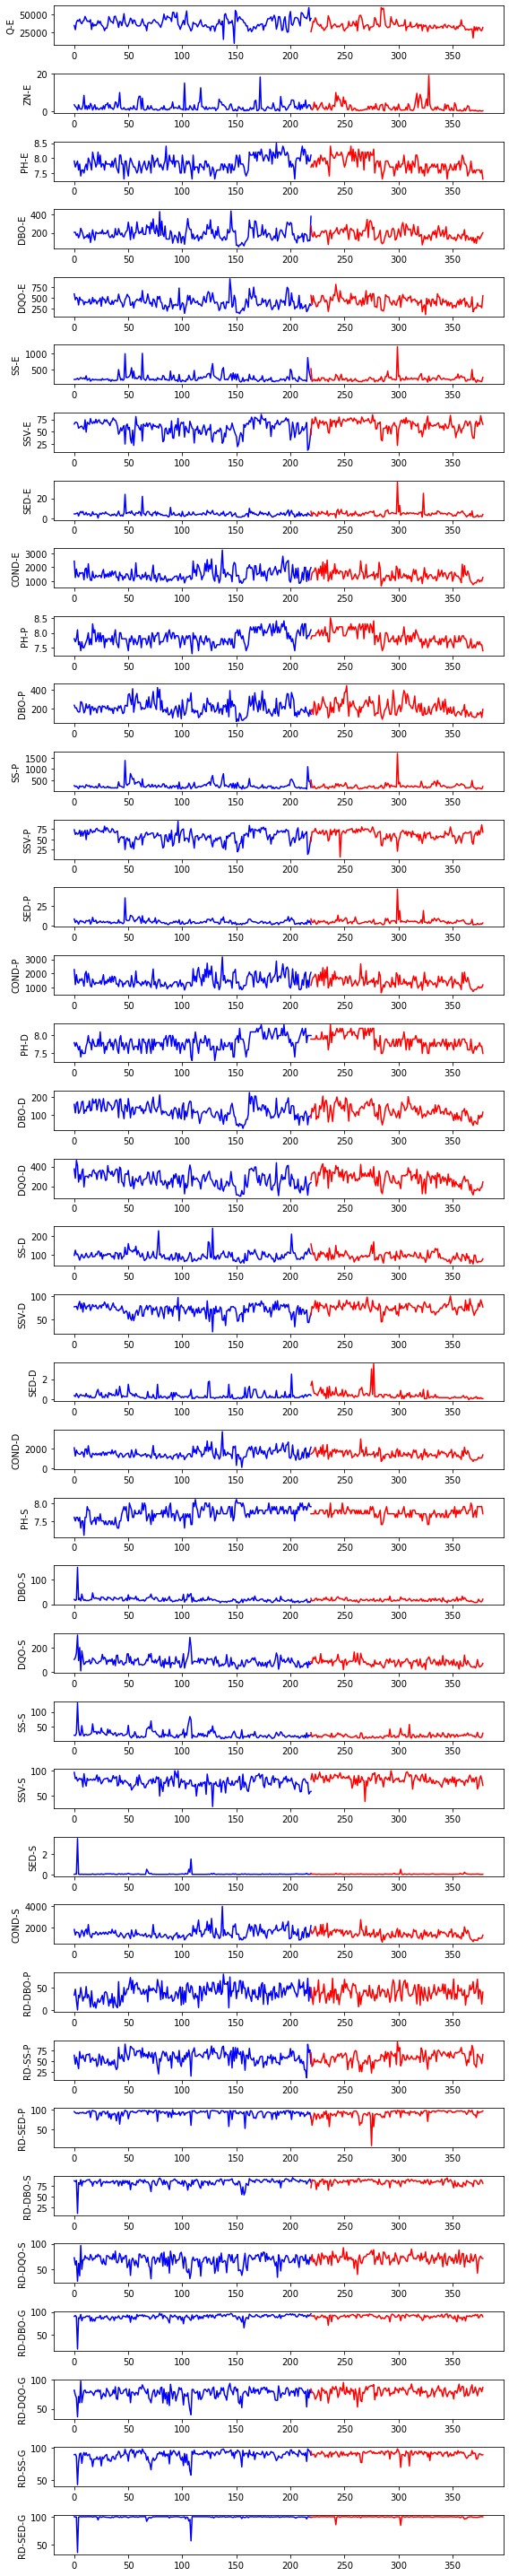

In [5]:
M = X_train.shape[1]
plt.figure(figsize=(8,40))
for i in range(M):
    plt.subplot(M,1,i+1)
    plt.plot(np.arange(len(X_train)), X_train[:,i], c='b')
    plt.plot(len(X_train) + np.arange(len(X_test)) - 1, X_test[:,i], c='r')
    plt.ylabel(f'{df.columns[i+1]}')

plt.tight_layout()
plt.show()

## View the Correlation Matrix

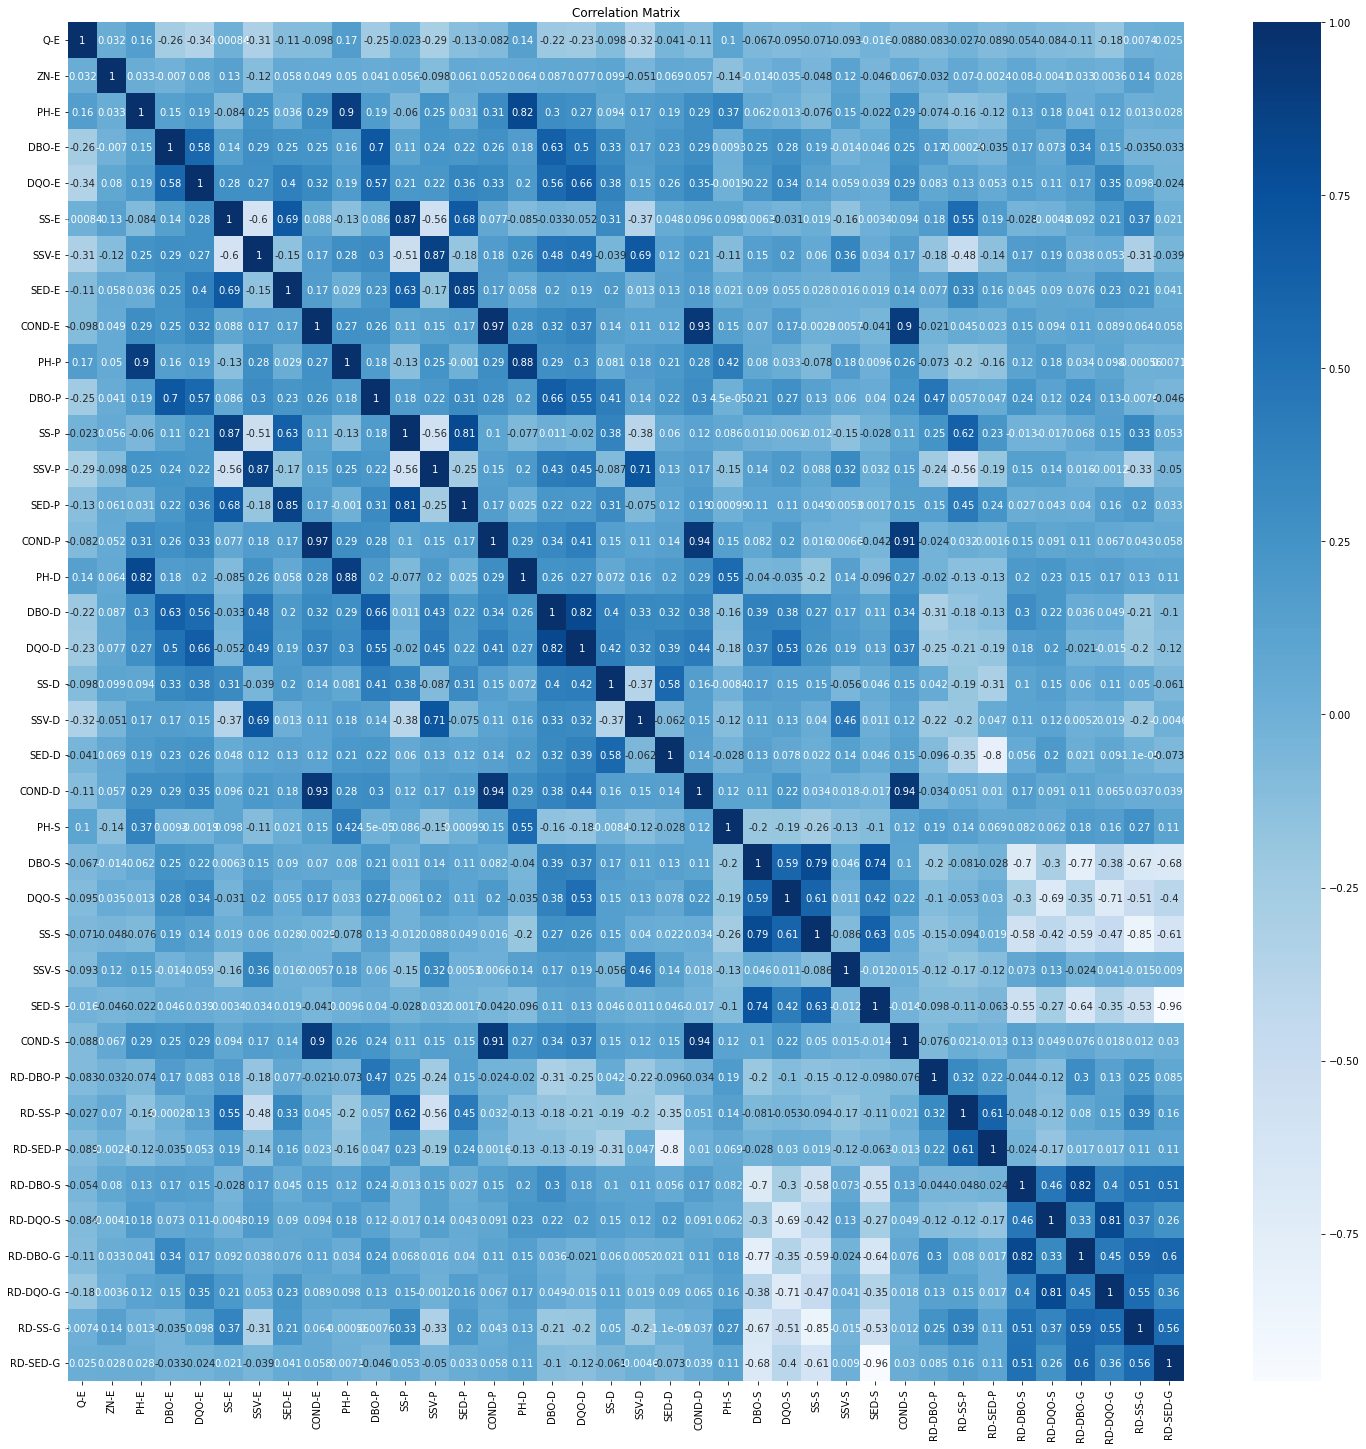

corr(PH-P, PH-E) = 0.8987555570280699.
corr(SS-P, SS-E) = 0.8749610842959274.
corr(SSV-P, SSV-E) = 0.8748585080097732.
corr(SED-P, SED-E) = 0.8543622013814822.
corr(SED-P, SS-P) = 0.8057994647081702.
corr(COND-P, COND-E) = 0.9723845701816827.
corr(PH-D, PH-E) = 0.8202688410239191.
corr(PH-D, PH-P) = 0.8849655376833178.
corr(DQO-D, DBO-D) = 0.8182339745806921.
corr(COND-D, COND-E) = 0.9344052033602506.
corr(COND-D, COND-P) = 0.9383676981561472.
corr(COND-S, COND-E) = 0.9045228566218397.
corr(COND-S, COND-P) = 0.9094349065328359.
corr(COND-S, COND-D) = 0.9441062485888901.
corr(RD-DBO-G, RD-DBO-S) = 0.8219307481111655.
corr(RD-DQO-G, RD-DQO-S) = 0.8068654272943581.
corr(RD-SS-G, SS-S) = -0.8501148988515467.
corr(RD-SED-G, SED-S) = -0.9634026506027752.


In [6]:
X = np.vstack((X_train, X_test))
df_x = pd.DataFrame(X, columns=df.columns[1:-1])
corr_matrix = df_x.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

cm = corr_matrix.to_numpy()

for i in range(len(cm)):
    for j in range(i):
        if np.abs(cm[i,j]) > 0.8:
            print(f"corr({df_x.columns[i]}, {df_x.columns[j]}) = {cm[i,j]}.")

## Perform Standard Scaling, then PCA

Explained variance ratio:    [0.19757222 0.16872618]
Cumulative percent variance: [19.75722158 36.62983981]
      1st PC    2nd PC    Year
0   1.212990 -3.775953  1990.0
1   0.872260  0.346813  1990.0
2   2.454643 -2.153599  1990.0
3  23.014292  7.359707  1990.0
4   1.816276  2.433052  1990.0


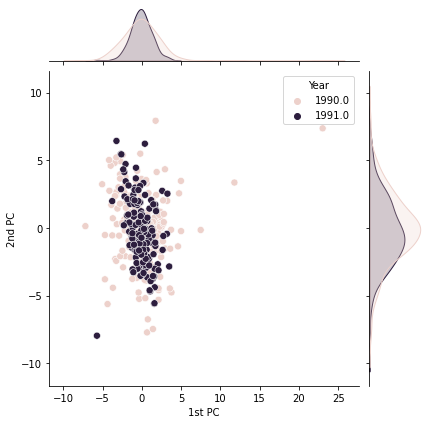

In [7]:
pca = make_pipeline(StandardScaler(), PCA(n_components=2))
X_train_pca = pca.fit(X_train).transform(X_train)
X_test_pca = pca.transform(X_test)

var = pca[1].explained_variance_ratio_
print(f"Explained variance ratio:    {var}")
print(f"Cumulative percent variance: {np.cumsum(var)*100}")

X_pca = np.vstack((X_train_pca, X_test_pca))

pca_df = pd.DataFrame(data=np.c_[X_pca, df["Year"]],
                      columns=['1st PC','2nd PC','Year'])
print(pca_df.head())

sns.jointplot(data=pca_df, x="1st PC", y="2nd PC", hue="Year", s=50)
#for txt, i in zip(df['Date'], range(len(X_pca))):
#    plt.annotate(txt, (X_pca[i,0], X_pca[i,1]))
plt.show()

## Perform KDE for anomaly detection

Threshold (KDE) = 0.001757232686227976


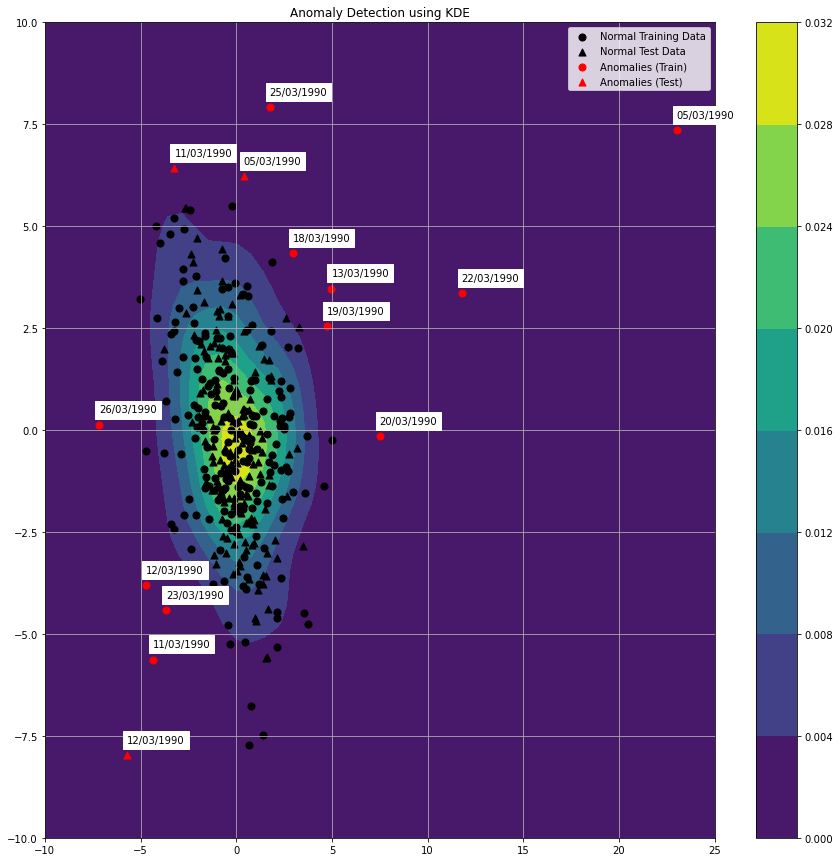

In [8]:
from sklearn.neighbors import KernelDensity

# Make a meshgrid for plotting surfaces
Xp, Yp = np.meshgrid(np.linspace(-10,25),np.linspace(-10,10))
XY = np.vstack([Xp.ravel(), Yp.ravel()]).T

# Generate the KDE surface as Z
kde = KernelDensity(kernel='gaussian').fit(X_train_pca)
Zp = np.exp(kde.score_samples(XY))
Zp = Zp.reshape(Xp.shape)

# Establish a confidence level of 95% (or 5% cutoff) 
# for the UCL using the quantile of kde_scores.
scores_train = kde.score_samples(X_train_pca)
scores_test = kde.score_samples(X_test_pca)
threshold = np.quantile(scores_train, 0.05)
print(f"Threshold (KDE) = {np.exp(threshold)}")

# Get the anomalous data points
normals_train = X_train_pca[scores_train > threshold,:]
normals_test = X_test_pca[scores_test > threshold,:]
anomals_train = X_train_pca[scores_train <= threshold,:]
anomals_test = X_test_pca[scores_test <= threshold,:]

plt.figure(figsize=(15,15))

cntr = plt.contourf(Xp, Yp, Zp, cmap='viridis')
plt.scatter(normals_train[:,0], normals_train[:,1], s=50, 
            color='k', marker='o', label='Normal Training Data')
plt.scatter(normals_test[:,0], normals_test[:,1], s=50, 
            color='k', marker='^', label='Normal Test Data')
plt.scatter(anomals_train[:,0], anomals_train[:,1], s=50, 
            color='r', marker='o', label='Anomalies (Train)')
plt.scatter(anomals_test[:,0], anomals_test[:,1], s=50, 
            color='r', marker='^', label='Anomalies (Test)')

for txt, i in zip(df['Date'], range(anomals_train.shape[0])):
    plt.annotate(txt, (anomals_train[i,0], anomals_train[i,1]+0.3), bbox=dict(color='white'))
    
for txt, i in zip(df['Date'], range(anomals_test.shape[0])):
    plt.annotate(txt, (anomals_test[i,0], anomals_test[i,1]+0.3), bbox=dict(color='white'))

plt.title('Anomaly Detection using KDE')
plt.colorbar(cntr)
plt.legend()
plt.grid()
plt.show()